<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-project/blob/main/Ch03_Deep_CNN_Architecture(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 심층 CNN 아키텍처

## ResNet 아키텍처

ResNet은 **스킵 연결** 개념을 도입하여, 매개변수를 줄이고, 경사 소실 문제를 모두 해결한다.  
입력은 먼저 비선형 변환(합성곱 다음에 비선형 활성화)을 통과한 다음 이 변환의 출력(잔차라고 함)을 원래 입력에 더한다.  
이러한 계산이 포함된 각 블록을 **잔차 블록(residual block)이라고 하며, **잔차 네트워크** 또는 **ResNet**은 이 이름에서 비롯됐다.  


ResNet은 **스킵 연결** 개념을 도입하여, 매개변수를 줄이고, 경사 소실 문제를 모두 해결한다.  
입력은 먼저 비선형 변환(합성곱 다음에 비선형 활성화)을 통과한 다음 이 변환의 출력(잔차라고 함)을 원래 입력에 더한다.  
이러한 계산이 포함된 각 블록을 **잔차 블록(residual block)이라고 하며, **잔차 네트워크** 또는 **ResNet**은 이 이름에서 비롯됐다.  
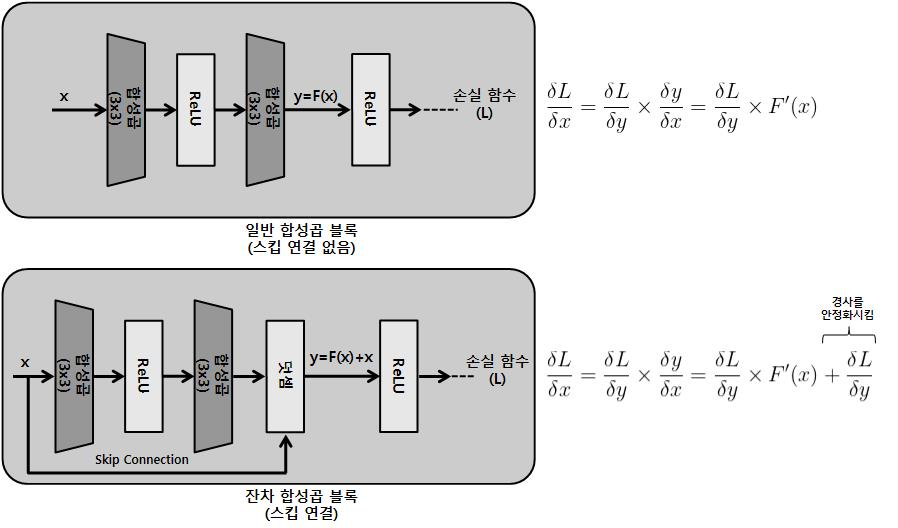  

이 스킵(또는 숏컷) 연결을 사용하면 전체 50개 계층(ResNet-50)에 대해 매개변수 개수를 2천 6백만 개로 제한한다. 매개변수 개수가 제한되므로 ResNet은 계층 수가 152개로 늘어나더라도(ResNet-152) 과적합 없이 일반화가 잘될 수 있다. 다음 다이어그램은 ResNet-50 아키텍처를 보여준다.  
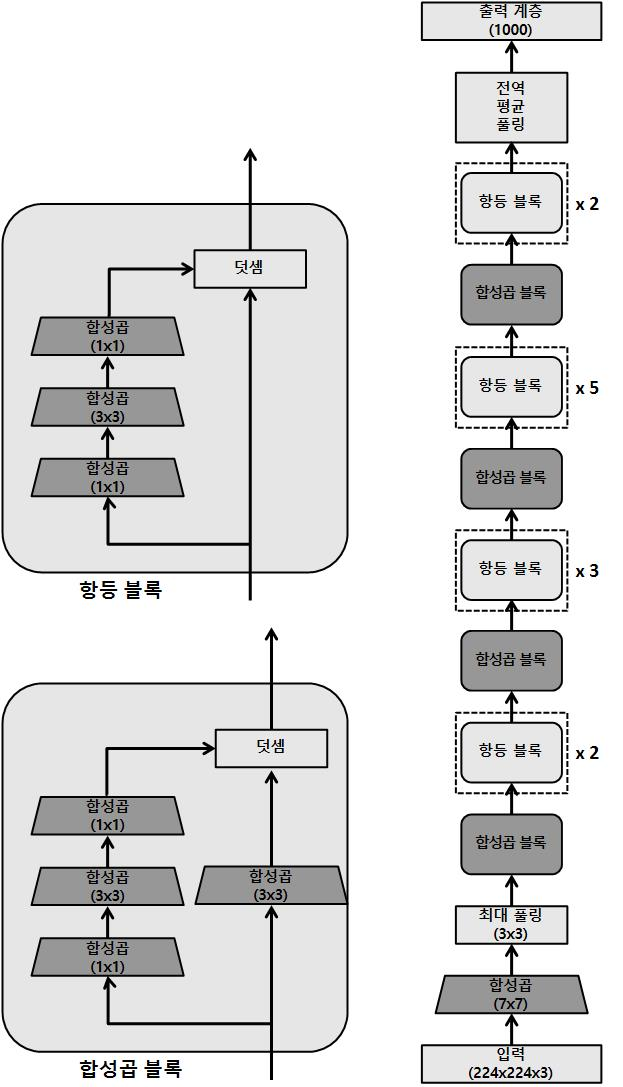

ResNet 아키텍처에는 **합성곱 블록(convolutional block)과 항등 블록(identify block), 두 종류의 잔차 블록이 있다.  
이 두 블록 모두 스킵 연결이 있다.  
합성곱 블록에는 1x1 합성곱 계층이 추가되어 차원을 축소하는 데 도움이 된다.  
ResNet의 잔차 블록은 다음처럼 파이토치에서 구현될 수 있다.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class BasicBlock(nn.Module):
    multiplier=1
    def __init__(self, input_num_planes, num_planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv_layer1 = nn.Conv2d(
            in_channels=input_num_planes,
            out_channels=num_planes,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False)
        self.batch_norm1 = nn.BatchNorm2d(num_planes)
        self.conv_layer2 = nn.Conv2d(
            in_channels=num_planes,
            out_channels=num_planes,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False)
        self.batch_norm2 = nn.BatchNorm2d(num_planes)

        self.res_connnection = nn.Sequential()
        if stride > 1 or input_num_planes != self.multiplier*num_planes:
            self.res_connnection = nn.Sequential(
                nn.Conv2d(
                  in_channels=input_num_planes,
                  out_channels=self.multiplier*num_planes,
                  kernel_size=1,
                  stride=stride,
                  bias=False),
                  nn.BatchNorm2d(self.multiplier*num_planes)
            )
    def forward(self, inp):
        op = F.relu(self.batch_norm1(self.conv_layer1(inp)))
        op = self.batch_norm2(self.conv_layer2(op))
        op += self.res_connnection(inp)
        op = F.relu(op)
        return op

In [4]:
import torchvision.models as models
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 81.9MB/s]
